In [1]:
import plotly.plotly as plotly
import plotly.figure_factory as ff
import pandas as pd


# Specs at https://wwwn.cdc.gov/Nchs/Nhanes/2005-2006/DEMO_D.htm
democsv = pd.read_csv("DEMO_D.csv")
democsv[:5]
#table = ff.create_table(democsv)
#py.iplot(table, filename='jupyter/table1')


,SEQN,SDDSRVYR,RIDSTATR,RIDEXMON,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDAGEEX,RIDRETH1,DMQMILIT,...,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANG,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA
0,31127.0,4.0,2.0,2.0,1.0,0.0,11.0,12.0,3.0,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,6434.950248,6571.396373,2.0,44.0
1,31128.0,4.0,2.0,1.0,2.0,11.0,132.0,132.0,4.0,NaN,...,2.0,2.0,1.0,2.0,2.0,1.0,9081.700761,8987.041810,1.0,52.0
2,31129.0,4.0,2.0,2.0,1.0,15.0,189.0,190.0,4.0,NaN,...,2.0,2.0,1.0,2.0,2.0,1.0,5316.895215,5586.719481,1.0,51.0
3,31130.0,4.0,2.0,2.0,2.0,85.0,NaN,NaN,3.0,2.0,...,2.0,2.0,NaN,NaN,NaN,NaN,29960.839509,34030.994786,2.0,46.0
4,31131.0,4.0,2.0,2.0,2.0,44.0,535.0,536.0,4.0,2.0,...,2.0,2.0,1.0,2.0,2.0,1.0,26457.708180,26770.584605,1.0,48.0


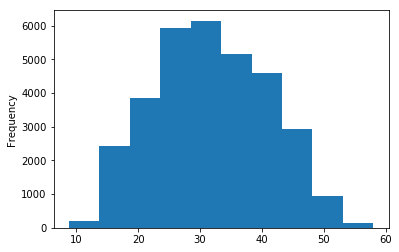

,SEQN,_MULT_,DXAEXSTS,DXITOTST,DXITOTBN,DXIHE,DXXHEA,DXAHEBV,DXXHEBMC,DXXHEBMD,...,DXDSTTOT,DXDSTPF,DXDTOA,DXDTOBMC,DXDTOBMD,DXDTOFAT,DXDTOLE,DXDTOLI,DXDTOTOT,DXDTOPF
0,31128.0,1.0,1.0,0.0,0.0,0.0,196.86,0.0,294.37,1.495,...,36830.5,22.8,1526.87,1487.02,0.974,9252.1,29624.6,31111.6,40363.7,22.9
1,31128.0,2.0,1.0,0.0,0.0,0.0,196.86,0.0,294.37,1.495,...,36830.5,22.8,1526.87,1487.02,0.974,9252.1,29624.6,31111.6,40363.7,22.9
2,31128.0,3.0,1.0,0.0,0.0,0.0,196.86,0.0,294.37,1.495,...,36830.5,22.8,1526.87,1487.02,0.974,9252.1,29624.6,31111.6,40363.7,22.9
3,31128.0,4.0,1.0,0.0,0.0,0.0,196.86,0.0,294.37,1.495,...,36830.5,22.8,1526.87,1487.02,0.974,9252.1,29624.6,31111.6,40363.7,22.9
4,31128.0,5.0,1.0,0.0,0.0,0.0,196.86,0.0,294.37,1.495,...,36830.5,22.8,1526.87,1487.02,0.974,9252.1,29624.6,31111.6,40363.7,22.9


In [2]:
import matplotlib.pyplot as plt

dxxcsv = pd.read_csv("dxx_d.csv")
dxxcsv['DXDTOPF'].plot.hist()

plt.show()
dxxcsv[:5]

In [3]:
dxxdemo = dxxcsv.set_index('SEQN').join(democsv.set_index('SEQN'))
white = dxxdemo['RIDRETH1'] == 3.0
male = dxxdemo['RIAGENDR'] == 1.0
adult = dxxdemo['RIDAGEEX'] > 18 * 12
whitemalebf = dxxdemo[white & male & adult][['RIDAGEEX', 'DXDTOPF']]
whitemalebf

,RIDAGEEX,DXDTOPF
SEQN,,
31143.0,229.0,21.8
31143.0,229.0,21.0
31143.0,229.0,21.2
31143.0,229.0,17.6
31143.0,229.0,25.6
31164.0,650.0,27.0
31164.0,650.0,27.0
31164.0,650.0,27.0
31164.0,650.0,27.0


In [4]:
wmbf = whitemalebf.reset_index()
wmbf

,SEQN,RIDAGEEX,DXDTOPF
0,31143.0,229.0,21.8
1,31143.0,229.0,21.0
2,31143.0,229.0,21.2
3,31143.0,229.0,17.6
4,31143.0,229.0,25.6
5,31164.0,650.0,27.0
6,31164.0,650.0,27.0
7,31164.0,650.0,27.0
8,31164.0,650.0,27.0
9,31164.0,650.0,27.0


In [5]:
bfArray = []
for x in range(0, len(whitemalebf), 5):
    bf = 0
    nulls = 0
    for n in range(0, 5):
        if pd.isnull(whitemalebf.iloc[x+n]['DXDTOPF']):
            nulls += 1
            continue
        bf += whitemalebf.iloc[x+n]
    if nulls == 5:
        break
    bfArray.append(bf / float(5 - nulls))


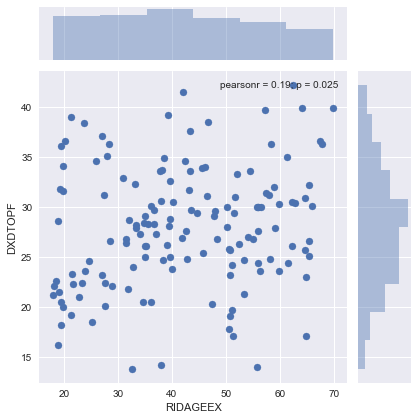

In [19]:
import seaborn as sns

sns.jointplot(pd.DataFrame(bfArray)['RIDAGEEX'] /12, pd.DataFrame(bfArray)['DXDTOPF'], kind="scatter")

sns.plt.savefig('scatter.png')
sns.plt.show()
